# **Exploring the Growth of Populations Around the World**

- Author: Yijun Zhou
- Date: 3/17/2025
- Description: A notebook containing a data analysis project using the world population dataset *Population Growth* by [Our World in Data](https://ourworldindata.org/population-growth#explore-data-on-population-growth) while referring to metadata of *Countries of the World* from [Kaggle](https://www.kaggle.com/datasets/fernandol/countries-of-the-world).

# **Rationale**
I've always been curious about the trend of world population and differences between countries:
*   Hypothesis 1: World population has been constantly increasing.
*   Hypothesis 2: China and India have the largest populations.
*   Hypothesis 3: Richer countries have lower population growth rate.

# **Locate the datasets**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/BIOF309/week_7_final_project/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# look for the datasets in the current folder
! ls

'~$nal project dataset.docx'   example			     final_project_world_population.ipynb
 countries_of_the_world.csv   'Final project dataset.docx'   population.csv


In [3]:
! head "population.csv" # this is the dataset that contains populations of countries around the world over the years

Entity,Year,Population - Sex: all - Age: all - Variant: estimates
Afghanistan,1950,7776182
Afghanistan,1951,7879343
Afghanistan,1952,7987783
Afghanistan,1953,8096703
Afghanistan,1954,8207953
Afghanistan,1955,8326981
Afghanistan,1956,8454302
Afghanistan,1957,8588340
Afghanistan,1958,8723412


In [4]:
! head "countries_of_the_world.csv" # this is the dataset that contains more metadata of countries around the world

Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
"Afghanistan ","ASIA (EX. NEAR EAST)         ",31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
"Albania ","EASTERN EUROPE                     ",3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
"Algeria ","NORTHERN AFRICA                    ",32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
"American Samoa ","OCEANIA                            ",57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
"Andorra ","WESTERN EUROPE                     ",

# **Data Exploration**

In [5]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read in data from "population.csv" and "countries_of_the_world.csv"
population = pd.read_csv("population.csv")
metadata = pd.read_csv("countries_of_the_world.csv")

In [7]:
# explore population
population.head() # 3rd column name is unnecessarily long

,Entity,Year,Population - Sex: all - Age: all - Variant: estimates
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953


In [8]:
# count the unique countries and years in population

# Count unique countries
unique_countries = population['Entity'].nunique()
print(f"Number of unique countries: {unique_countries}")

# Count unique years
unique_years = population['Year'].nunique()
print(f"Number of unique years: {unique_years}")

# Find out the smallest and largest number in 'Year'
min_year = population['Year'].min()
max_year = population['Year'].max()
print(f"Smallest year: {min_year}")
print(f"Largest year: {max_year}")

Number of unique countries: 256
Number of unique years: 74
Smallest year: 1950
Largest year: 2023


**This is the main dataset to plot change of populations between 1950 and 2023.**

In [9]:
# explore metadata
metadata.head()

# "Country" contains a list of country names.
# "Population" is a one-time point data.
# "GDP" would be an indicator of the wealthiness of the country.

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# **Testing hypothesis 1: World population has been constantly increasing.**

In [10]:
#change the 3rd column name of dataframe population into "Population"
population.rename(columns={population.columns[2]: "Population"}, inplace=True)
population.head()

,Entity,Year,Population
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953


In [11]:
#compute world population by adding populations from each country, group by year and store in a new dataframe
world_population = population.groupby('Year')['Population'].sum().reset_index()
world_population

,Year,Population
0,1950,15728830804
1,1951,16016538108
2,1952,16326304780
3,1953,16654618990
4,1954,16995037432
...,...,...
69,2019,52245594802
70,2020,52789609898
71,2021,53280217058
72,2022,53769482748


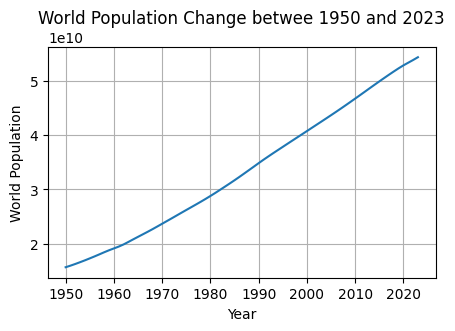

In [12]:
# plot world population change over the years
plt.figure(figsize=(5, 3))
plt.plot(world_population['Year'], world_population['Population'])
plt.xlabel('Year')
plt.ylabel('World Population')
plt.title('World Population Change betwee 1950 and 2023')
plt.grid(True)
plt.show()


### **Conclusion: world population has been constantly increasing.**

# **Testing hypothesis 2: China and India have the largest populations.**

In [13]:
# find out the 10 countries with the largest populations
metadata_sorted = metadata.sort_values('Population', ascending=False) # Sort the dataframe by population in descending order
metadata_sorted.head(10) # Display the top 10 countries with the largest populations

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
214,United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9","52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,"206,2","0,13","-2,77","72,44",2100.0,"45,7","31,8","27,87","0,87","71,26",1,"29,74","8,23","0,216","0,251","0,533"
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,"1023,4","0,40","-0,71","62,6",1900.0,"43,1","7,3","62,11","3,07","34,82",2,"29,8","8,27","0,199","0,198","0,603"
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575"
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,"142,7","0,09","0,26","98,8",900.0,"68,0","9,3","31,29","2,96","65,75","1,5","40,43","16,94","0,269","0,487","0,244"
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,"337,4","7,87",0,"3,26",28200.0,"99,0","461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"


In [14]:
#plot the populations of the 10 countries with the largest populations

import altair as alt

# Sort the dataframe by population in descending order and select the top 10
top_10_countries = metadata_sorted.sort_values('Population', ascending=False).head(10)

# Create the bar chart
chart = alt.Chart(top_10_countries).mark_bar().encode(
    x='Country',
    y='Population'
).properties(
    title='Top 10 Countries by Population'
)

chart


alt.Chart(...)

### **Conclusion: China and India have the largest populations.**


# **Testing hypothesis 3: richer countries have lower population growth rate.**

### First need to find the top 10 countries with the largest population and focus on analyzing data from these countries for hypothesis 3.

In [15]:
metadata.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [16]:
# find the top 10 countries with the largest populations based on metadata
metadata_sorted = metadata.sort_values('Population', ascending=False) # Sort the dataframe by population in descending order
metadata_sorted.head(10) # Display the top 10 countries with the largest populations

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
214,United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9","52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,"206,2","0,13","-2,77","72,44",2100.0,"45,7","31,8","27,87","0,87","71,26",1,"29,74","8,23","0,216","0,251","0,533"
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,"1023,4","0,40","-0,71","62,6",1900.0,"43,1","7,3","62,11","3,07","34,82",2,"29,8","8,27","0,199","0,198","0,603"
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575"
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,"142,7","0,09","0,26","98,8",900.0,"68,0","9,3","31,29","2,96","65,75","1,5","40,43","16,94","0,269","0,487","0,244"
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,"337,4","7,87",0,"3,26",28200.0,"99,0","461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"


In [17]:
# create a new dataframe extracting the top 10 rows from metadata_sorted
top_10_countries = metadata_sorted.head(10)
top_10_countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
214,United States,NORTHERN AMERICA,298444215,9631420,"31,0","0,21","3,41","6,5",37800.0,"97,0","898,0","19,13","0,22","80,65",3,"14,14","8,26","0,01","0,204","0,787"
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,"127,9","2,85",0,"35,6",3200.0,"87,9","52,0","11,32","7,23","81,45",2,"20,34","6,25","0,134","0,458","0,408"
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,"206,2","0,13","-2,77","72,44",2100.0,"45,7","31,8","27,87","0,87","71,26",1,"29,74","8,23","0,216","0,251","0,533"
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,"1023,4","0,40","-0,71","62,6",1900.0,"43,1","7,3","62,11","3,07","34,82",2,"29,8","8,27","0,199","0,198","0,603"
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575"
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,"142,7","0,09","0,26","98,8",900.0,"68,0","9,3","31,29","2,96","65,75","1,5","40,43","16,94","0,269","0,487","0,244"
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,"337,4","7,87",0,"3,26",28200.0,"99,0","461,2","12,19","0,96","86,85",3,"9,37","9,16","0,017","0,258","0,725"


In [18]:
# create a new dataframe extracting "Country" and "GDP ($ per capita)" from top_10_countries
top_10_countries_gdp = top_10_countries[['Country', 'GDP ($ per capita)']]
top_10_countries_gdp

# change second column name to GDP
top_10_countries_gdp.rename(columns={top_10_countries_gdp.columns[1]: "GDP"}, inplace=True)
top_10_countries_gdp

# remove spaces flanking country names
top_10_countries_gdp['Country'] = top_10_countries_gdp['Country'].str.strip()
top_10_countries_gdp

<ipython-input-18-b51b510080eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_gdp.rename(columns={top_10_countries_gdp.columns[1]: "GDP"}, inplace=True)
<ipython-input-18-b51b510080eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_gdp['Country'] = top_10_countries_gdp['Country'].str.strip()


,Country,GDP
42,China,5000.0
94,India,2900.0
214,United States,37800.0
95,Indonesia,3200.0
27,Brazil,7600.0
156,Pakistan,2100.0
16,Bangladesh,1900.0
169,Russia,8900.0
152,Nigeria,900.0
103,Japan,28200.0


### Second, calculate population growth rate. To keep it simple, only calculate growth rate by ten years between 2013 and 2023.

In [19]:
population.head()

# remove spaces flanking "Entity" names
population['Entity'] = population['Entity'].str.strip()
population

,Entity,Year,Population
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953
...,...,...,...
18939,Zimbabwe,2019,15271377
18940,Zimbabwe,2020,15526888
18941,Zimbabwe,2021,15797220
18942,Zimbabwe,2022,16069061


In [25]:
# use data from "population", calculate growth rate by ten years between 2013 and 2023 of countries among "top_10_countries_gdp".

# Filter data for the years 2013 and 2023
population_2013 = population[(population['Year'] == 2013) & (population['Entity'].isin(top_10_countries_gdp['Country']))]
population_2023 = population[(population['Year'] == 2023) & (population['Entity'].isin(top_10_countries_gdp['Country']))]

# Merge the dataframes
merged_population = pd.merge(population_2013, population_2023, on='Entity', suffixes=('_2013', '_2023'))

# Calculate the growth rate
merged_population['Growth_Rate'] = ((merged_population['Population_2023'] - merged_population['Population_2013']) / merged_population['Population_2013']) * 100

# change dataframe name to top_10_countries_growth_rate
merged_population.rename(columns={'Entity': 'Country'}, inplace=True)
top_10_countries_growth_rate = merged_population

# Display the first few rows to confirm the change
top_10_countries_growth_rate

,Country,Year_2013,Population_2013,Year_2023,Population_2023,Growth_Rate
0,Bangladesh,2013,156532135,2023,171466986,9.541077
1,Brazil,2013,198478291,2023,211140731,6.379761
2,China,2013,1379008046,2023,1422584937,3.160017
3,India,2013,1295829506,2023,1438069597,10.976760
4,Indonesia,2013,255852466,2023,281190068,9.903208
5,Japan,2013,127723641,2023,124370947,-2.624960
6,Nigeria,2013,181049443,2023,227882949,25.867799
7,Pakistan,2013,211073979,2023,247504504,17.259600
8,Russia,2013,144604102,2023,145440504,0.578408
9,United States,2013,320110753,2023,343477332,7.299530


### Third, merge GDP and growthrate data from top 10 countries and perform the final analysis.

In [21]:
# merge GDP and growthrate data from top 10 countries
top_10_countries_merged = pd.merge(top_10_countries_gdp, top_10_countries_growth_rate[['Country', 'Growth_Rate']], on='Country')
top_10_countries_merged

,Country,GDP,Growth_Rate
0,China,5000.0,3.160017
1,India,2900.0,10.976760
2,United States,37800.0,7.299530
3,Indonesia,3200.0,9.903208
4,Brazil,7600.0,6.379761
5,Pakistan,2100.0,17.259600
6,Bangladesh,1900.0,9.541077
7,Russia,8900.0,0.578408
8,Nigeria,900.0,25.867799
9,Japan,28200.0,-2.624960


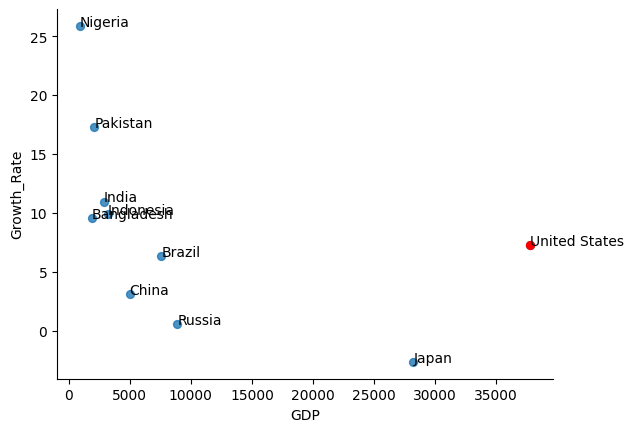

In [22]:
# @title GDP vs Growth_Rate

top_10_countries_merged.plot(kind='scatter', x='GDP', y='Growth_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# label each data point
for i, row in top_10_countries_merged.iterrows():
    plt.annotate(row['Country'], (row['GDP'], row['Growth_Rate']))

# highlight United States with red color
us_data = top_10_countries_merged[top_10_countries_merged['Country'] == 'United States']
plt.scatter(us_data['GDP'], us_data['Growth_Rate'], s=32, color='red')

### Looks like there is a negative correlation between GDP and population growth rate. Although United States is different, probably because US absorbs more immigrants than other countries.

In [23]:
# remove United States from the dataset, perform correlation analysis
top_10_countries_merged = top_10_countries_merged[top_10_countries_merged['Country'] != 'United States']
correlation_matrix = top_10_countries_merged[['GDP', 'Growth_Rate']].corr()
correlation_matrix

,GDP,Growth_Rate
GDP,1.000000,-0.695065
Growth_Rate,-0.695065,1.000000


### **Conclusion: in most cases, richer countries do have a lower population growth rate, but US is different since US's GDP and population growth rate are both high, probably because it absorbs more immigrants that most other countries.**